# **1. Perkenalan Dataset** (FIX)


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

---

## **Clustering Pola Pembelian Produk**

**Dataset Overview:**

**Beverage Sales Dataset** adalah kumpulan data yang merekam pola penjualan dalam industri minuman, dirancang untuk eksplorasi segmentasi pelanggan berdasarkan pola pembelian dan faktor harga. Dataset ini mencakup `8.999.910 sampel transaksi`, terdiri dari transaksi Business-to-Business (B2B) dan Business-to-Consumer (B2C). Dengan cakupan data yang luas, dataset ini memungkinkan berbagai analisis, termasuk segmentasi pelanggan, analisis produk, dan identifikasi tren penjualan.

**Key Features:**

Dataset ini berisi informasi tentang setiap transaksi, dengan variabel-variabel berikut:
- `Order_ID` → ID unik untuk setiap pesanan. Satu pesanan bisa mencakup beberapa produk.
- `Customer_ID` → ID unik pelanggan yang membedakan setiap pembeli.
- `Customer_Type` → Jenis pelanggan: B2B (Business-to-Business) atau B2C (Business-to-Consumer).
- `Product` → Nama produk yang dibeli (misalnya Coca-Cola, Erdinger Weißbier).
- `Category` → Kategori produk (Soft Drinks, Alcoholic Beverages, dll.).
- `Unit_Price` → Harga per unit produk.
- `Quantity` → Jumlah unit produk yang dibeli dalam satu pesanan.
- `Discount` → Diskon yang diberikan pada produk (hanya untuk pelanggan B2B).
- `Total_Price` → Total harga setelah diskon diterapkan.
- `Region` → Wilayah pelanggan (misalnya Bayern, Berlin).
- `Order_Date` → Tanggal pesanan dilakukan.

**Objective:**
- Mengelompokkan produk berdasarkan pola pembelian dan faktor harga.

**Source:**
- https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales/data

# **2. Import Library** (FIX)

Pada tahap ini, kita akan mengimpor beberapa pustaka (library) Python yang diperlukan untuk melakukan analisis data serta membangun model machine learning. Pustaka ini mencakup berbagai fungsi, mulai dari manipulasi data, visualisasi, preprocessing, hingga penerapan algoritma clustering.

In [2]:
# Import library untuk manipulasi dan visualisasi Data
import pandas as pd  # Untuk mengelola dan menganalisis data dalam bentuk DataFrame
import numpy as np
import seaborn as sns  # Untuk visualisasi data yang lebih informatif
import matplotlib.pyplot as plt  # Untuk membuat grafik dan plot

# Import library untuk preprocessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # Teknik normalisasi atau scaling data numerik
from sklearn.preprocessing import LabelEncoder  # Untuk mengubah data kategorikal menjadi bentuk numerik

# Import library untuk evaluasi clustering
from yellowbrick.cluster import KElbowVisualizer  # Untuk menentukan jumlah klaster optimal menggunakan metode Elbow

# Import algoritma clustering
from sklearn.cluster import KMeans, DBSCAN  # KMeans untuk clustering berbasis centroid, DBSCAN untuk clustering berbasis kepadatan (density)

# Import silhouette_score
from sklearn.metrics import silhouette_score # Untuk mengevaluasi hasil clustering

# Import library untuk reduksi dimensi
from sklearn.decomposition import PCA  # Untuk mengurangi jumlah fitur agar lebih mudah divisualisasikan

Dengan mengimpor pustaka-pustaka ini, kita dapat memulai untuk mempersiapkan data.

# **3. Memuat Dataset** (FIX)

Pada tahap ini, Kita perlu memuat dataset ke dalam notebook dalam format CSV dengan menggunakan pustaka `pandas` untuk membacanya. Kita akan mengecek beberapa baris awal dataset untuk memahami struktur datanya.

In [3]:
df_sales = pd.read_csv("Dataset_clustering.csv")
df_sales.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


# **4. Exploratory Data Analysis (EDA)** (REVISI)

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

---

Pada tahap ini, Kita akan melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset sebelum menerapkan model machine learning. EDA membantu mengidentifikasi pola dalam data, menemukan anomali, serta menentukan langkah-langkah preprocessing yang diperlukan.

### **4.1. Memahami Struktur Data** (REVISI)

Sebelum melakukan analisis lebih lanjut, langkah pertama dalam Exploratory Data Analysis (EDA) adalah memahami struktur dataset. Hal ini mencakup jumlah entri (baris), jumlah kolom, serta tipe data di setiap kolom.

In [4]:
# Melihat struktur dataset
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


Berdasarkan hasil pengamatan struktur data di atas, terdapat beberapa poin yang dapat disimpulkan sebagai berikut.
- Dataset memiliki 8.999.910 entri dan 11 kolom. Ini adalah dataset yang cukup besar, sehingga pengelolaan memori dan efisiensi pemrosesan menjadi perhatian utama.
- Tipe data terdiri dari:
     1. 7 kolom bertipe `object` (`Order_ID`, `Customer_ID`, `Customer_Type`, `Product`, `Category`, `Region`, dan `Order_Date`) yang kemungkinan besar berisi data kategorikal atau teks.
     2. 3 kolom numerik bertipe `float64` (`Unit_Price`, `Discount`, `Total_Price`) yang menunjukkan nilai harga atau diskon.
     3. 1 kolom bertipe `int64` (`Quantity`) yang mewakili jumlah produk dalam setiap pesanan. Kolom `Order_Date` masih dalam format `object` (string). Perlu dikonversi ke tipe `datetime` untuk memudahkan analisis berbasis waktu.

Kita akan mengidentifikasi kolom-kolom kategori dalam dataframe `df_sales`, yang mencakup informasi seperti ID pesanan, ID pelanggan, jenis pelanggan, produk, kategori produk, wilayah, dan tanggal pemesanan.

In [5]:
category_col = df_sales.select_dtypes(include=['object','category']).columns.tolist()
for column in df_sales[category_col]:
    print(f'{column} : {df_sales[column].unique()}')
    print()

Order_ID : ['ORD1' 'ORD2' 'ORD3' ... 'ORD2999998' 'ORD2999999' 'ORD3000000']

Customer_ID : ['CUS1496' 'CUS2847' 'CUS1806' ... 'CUS7701' 'CUS4767' 'CUS6117']

Customer_Type : ['B2B' 'B2C']

Product : ['Vio Wasser' 'Evian' 'Sprite' 'Rauch Multivitamin' 'Gerolsteiner'
 'Sauvignon Blanc' 'Tomato Juice' 'Vittel' 'San Pellegrino' 'Mountain Dew'
 'Hohes C Orange' 'Red Bull' 'Chardonnay' 'Tanqueray' 'Rotkäppchen Sekt'
 'Mango Juice' 'Apollinaris' 'Riesling' 'Granini Apple' 'Fanta' 'Rockstar'
 'Club Mate' 'Krombacher' 'Erdinger Weißbier' 'Volvic Touch' 'Volvic'
 'Schwip Schwap' 'Fritz-Kola' 'Coca-Cola' 'Selters' 'Cranberry Juice'
 'Mezzo Mix' "Beck's" 'Passion Fruit Juice' 'Monster' 'Augustiner' 'Pepsi'
 'Merlot' 'Kölsch' 'Bacardi' 'Warsteiner' 'Moët & Chandon' 'Jever'
 'Veuve Clicquot' 'Johnnie Walker' 'Havana Club' 'Jack Daniels']

Category : ['Water' 'Soft Drinks' 'Juices' 'Alcoholic Beverages']

Region : ['Baden-Württemberg' 'Schleswig-Holstein' 'Hamburg' 'Bayern' 'Saarland'
 'Thüringen' '

Berdasarkan hasil eksplorasi diatas, beberapa insight yang bisa didapatkan terkait kolom kategori di dataframe df_sale sebagai berikut.
- `Order_ID` dan `Customer_ID` bersifat unik untuk setiap entri sehingga tidak relevan untuk pemodelan langsung tetapi bisa digunakan untuk analisis transaksi atau pelanggan.
- Tipe pelanggan (`Customer_Type`) hanya memiliki dua kategori: `B2C (Business to Customer)` dan `B2B (Business to Business)`, yang bisa digunakan untuk segmentasi pelanggan.
- Produk sangat beragam, mencakup berbagai merek minuman. Empat kategori utama: `Soft Drinks`, `Water`, `Alcoholic Beverages`, dan `Juices`, yang bisa digunakan untuk analisis preferensi pelanggan.
- Data wilayah (`Region`) mencakup beberapa wilayah di Jerman, yang bisa dianalisis untuk melihat pola penjualan berdasarkan lokasi.
- Format tanggal pemesanan (`Order_Date`) sudah dalam YYYY-MM-DD, cocok untuk analisis tren penjualan berdasarkan waktu.

In [6]:
# Ambil subset dataset secara acak karena dataset terlalu besar
df_sales = df_sales.sample(n=3000, random_state=69, ignore_index=True)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       3000 non-null   object 
 1   Customer_ID    3000 non-null   object 
 2   Customer_Type  3000 non-null   object 
 3   Product        3000 non-null   object 
 4   Category       3000 non-null   object 
 5   Unit_Price     3000 non-null   float64
 6   Quantity       3000 non-null   int64  
 7   Discount       3000 non-null   float64
 8   Total_Price    3000 non-null   float64
 9   Region         3000 non-null   object 
 10  Order_Date     3000 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 257.9+ KB


### **4.2. Menangani Data yang Hilang** (FIX)

Untuk melihat jumlah data yang hilang dalam dataframe `df_sales`, kita dapat mengidentifikasi apakah terdapat data yang tidak lengkap dalam setiap kolom.

In [7]:
# Mengecek jumlah data yang hilang
print(df_sales.isnull().sum())

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


Dapat disimpulkan bahwa dataframe `df_sales` tidak memiliki nilai yang hilang dalam setiap kolomnya. Hal ini menunjukkan bahwa data yang tersedia cukup bersih dan siap untuk dianalisis lebih lanjut tanpa perlu dilakukan imputasi atau pembersihan tambahan terkait missing values.

### **4.3. Analisis Distribusi dan Korelasi** (FIX)

Untuk memahami distribusi variabel numerik, kita akan menggunakan histogram dan boxplot.
Fungsi `plot_all_numerical_histograms()` digunakan untuk menampilkan histogram yang menunjukkan bentuk distribusi data (termasuk skewness). Fungsi `plot_all_numerical_boxplots()` digunakan untuk mendeteksi outlier.

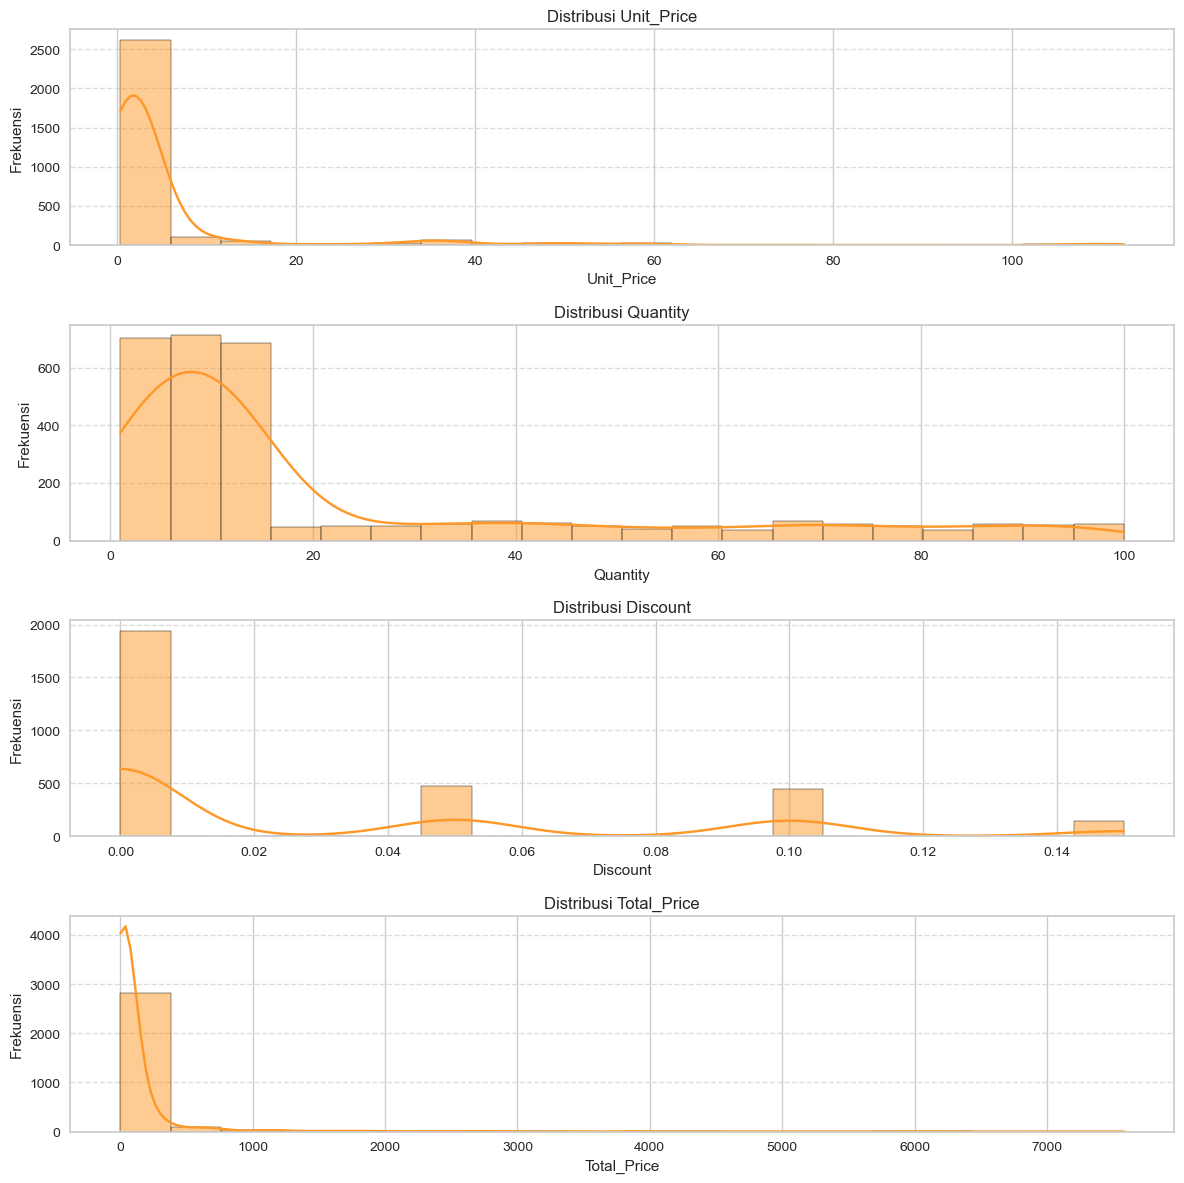

In [8]:
def plot_all_numerical_histograms(df):
    """
    Menampilkan histogram untuk semua fitur numerik dalam DataFrame.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    numeric_cols = df.select_dtypes(include=['number']).columns  # Memilih kolom numerik
    
    plt.figure(figsize=(12, len(numeric_cols) * 3))  # Menyesuaikan ukuran plot
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.histplot(df[col], bins=20, kde=True, color=custom_palette[1])  # Histogram dengan KDE
        plt.title(f'Distribusi {col}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_all_numerical_histograms(df_sales)

Dari hasil distribusi histogram yang ditampilkan untuk variabel `Unit_Price`, `Quantity`, `Discount`, dan `Total_Price`, terdapat beberapa insight sebagai berikut.

1. Distribusi `Unit_Price`
     - Mayoritas harga satuan produk berada di kisaran nilai kecil (mendekati 0).
     - Distribusi menunjukkan skewness positif (right-skewed), yang berarti ada beberapa produk dengan harga sangat tinggi yang menjadi outlier.
     - Ini mengindikasikan bahwa sebagian besar produk memiliki harga rendah, tetapi ada sedikit produk premium dengan harga yang jauh lebih mahal.
2. Distribusi `Quantity`
     - Sebagian besar jumlah produk yang dibeli berada di kisaran kecil (0-10), dengan distribusi yang juga skewed ke kanan.
     - Ada beberapa transaksi dengan jumlah produk yang jauh lebih besar (mungkin pembelian grosir).
     - Outlier bisa terjadi di transaksi dengan jumlah besar, yang perlu dianalisis lebih lanjut apakah merupakan tren normal atau anomali.
3. Distribusi `Discount`
     - Kebanyakan transaksi memiliki diskon mendekati 0, dengan beberapa titik diskon tertentu yang lebih tinggi.
     - Distribusi tidak merata dan tampaknya terdapat diskon yang diberikan dalam rentang spesifik, misalnya 5%, 10%, dan 15%.
     - Kemungkinan ada kebijakan diskon berbasis tier atau batasan tertentu untuk pemberian diskon.
4. Distribusi `Total_Price`
     - Distribusi mirip dengan Unit Price, menunjukkan skewness positif yang cukup kuat.
     - Sebagian besar transaksi memiliki total harga yang rendah, tetapi ada transaksi dengan total harga yang sangat tinggi.
     - Outlier pada total harga mungkin berasal dari transaksi besar dengan banyak produk atau harga satuan yang tinggi.

**Insight:**
- Semua variabel menunjukkan distribusi yang skewed ke kanan, yang berarti sebagian besar data berada pada nilai kecil, tetapi ada beberapa nilai ekstrem yang jauh lebih besar.
- Distribusi `Discount` menunjukkan pola tiered pricing, yang bisa dianalisis lebih lanjut.
- Perlu dilakukan identifikasi outlier, terutama untuk `Unit_Price`, `Quantity`, dan `Total_Price`, untuk memastikan apakah ini adalah pola bisnis yang wajar atau ada anomali.

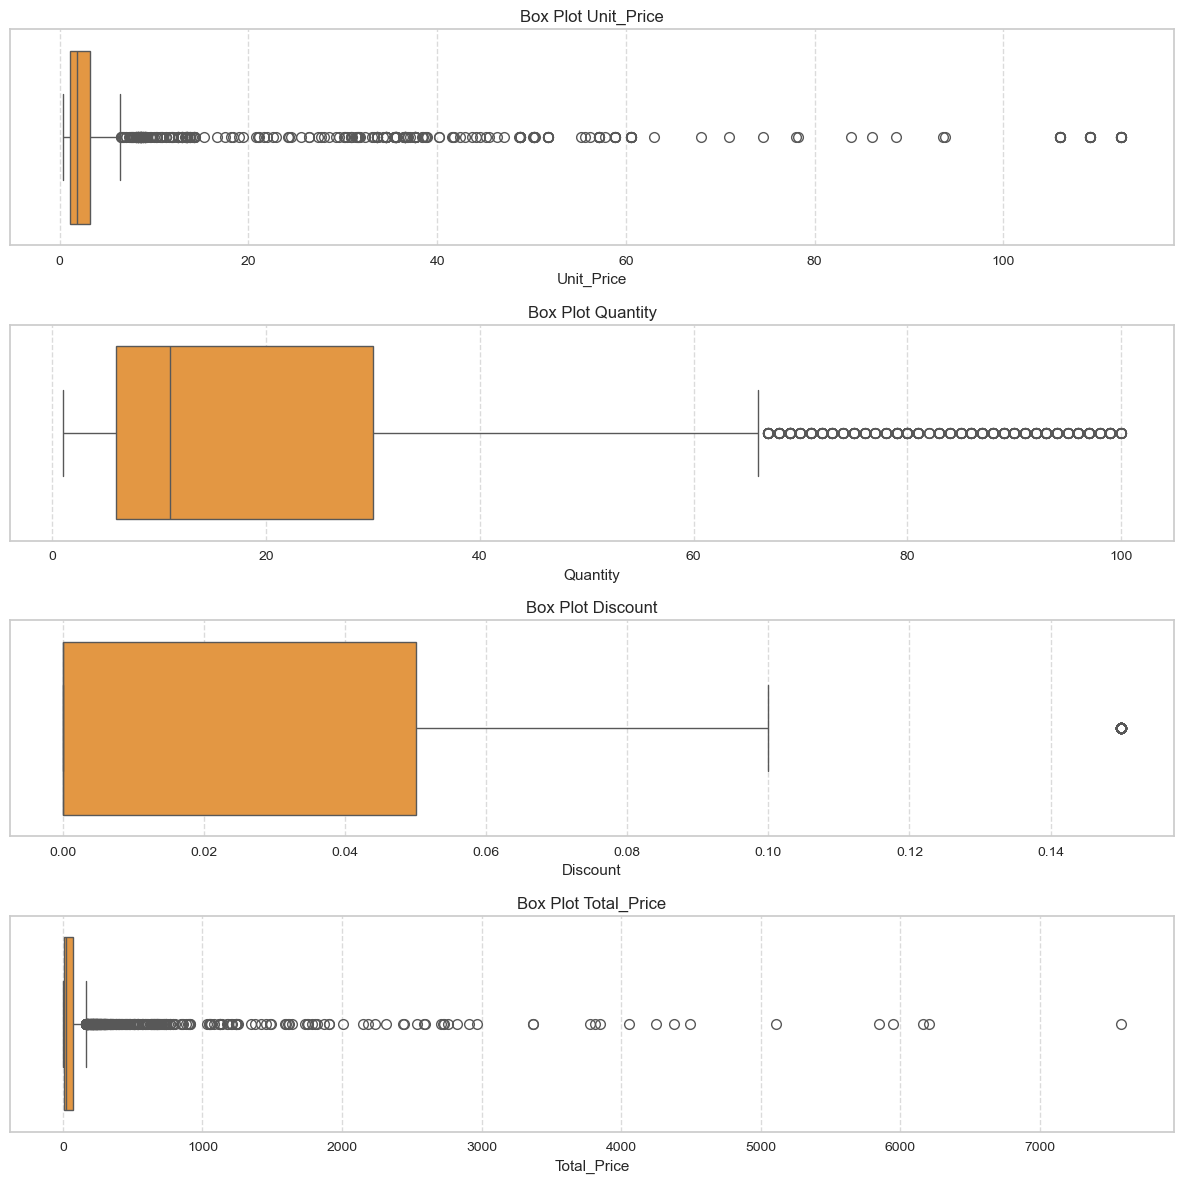

In [9]:
def plot_all_numerical_boxplots(df):
    """
    Menampilkan boxplot untuk semua fitur numerik dalam DataFrame.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
    """
    # Custom palette
    custom_palette = sns.color_palette("YlOrBr", 3)  # Ambil 3 warna

    numeric_cols = df.select_dtypes(include=['number']).columns  # Memilih kolom numerik
    
    plt.figure(figsize=(12, len(numeric_cols) * 3))  # Menyesuaikan ukuran plot
    
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(len(numeric_cols), 1, i)
        sns.boxplot(x=df[col], color=custom_palette[1])  # Boxplot
        plt.title(f'Box Plot {col}')
        plt.xlabel(col)
        plt.grid(axis='x', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

plot_all_numerical_boxplots(df_sales)

Dari hasil boxplot untuk variabel `Unit_Price`, `Quantity`, `Discount`, dan `Total_Price`, terdapat beberapa insight yang dapat diambil terkait outlier dan distribusi data.
1. Boxplot `Unit_Price`
     - Banyak outlier terdeteksi di sisi kanan (harga tinggi).
     - Mayoritas harga satuan berada di rentang kecil, dengan skewness positif yang jelas.
     - Outlier ini bisa menunjukkan produk premium atau kesalahan input harga.
2. Boxplot `Quantity`
     - Sebagian besar transaksi memiliki jumlah produk yang relatif kecil.
     - Terdapat banyak outlier dengan jumlah yang jauh lebih besar dari median, terutama di atas 50 unit.
     - Outlier ini kemungkinan berasal dari transaksi skala besar seperti pembelian grosir.
3. Boxplot `Discount`
     - Diskon memiliki distribusi yang lebih rapat tanpa banyak outlier, kecuali satu titik ekstrem yang jauh lebih besar.
     - Sebagian besar transaksi memiliki diskon rendah atau tidak ada diskon sama sekali.
     - Outlier ini mungkin menunjukkan promo spesial atau kesalahan input data.
4. Boxplot `Total_Price`
     - Distribusi mirip dengan Unit Price, dengan banyak outlier di sisi kanan.
     - Beberapa transaksi memiliki total harga yang sangat tinggi, mungkin karena kombinasi harga satuan tinggi dan jumlah besar.
     - Outlier ini perlu dianalisis lebih lanjut untuk memastikan tidak ada kesalahan input atau transaksi anomali.

**Insight:**
- Banyak outlier yang signifikan pada `Unit_Price`, `Quantity`, dan `Total_Price`, yang perlu dianalisis lebih lanjut.
- Distribusi `Discount` lebih stabil, dengan sedikit outlier.
- Perlu dilakukan eksplorasi lebih lanjut apakah outlier ini wajar atau merupakan anomali yang harus ditangani, misalnya dengan transformasi data atau penanganan outlier seperti winsorization.

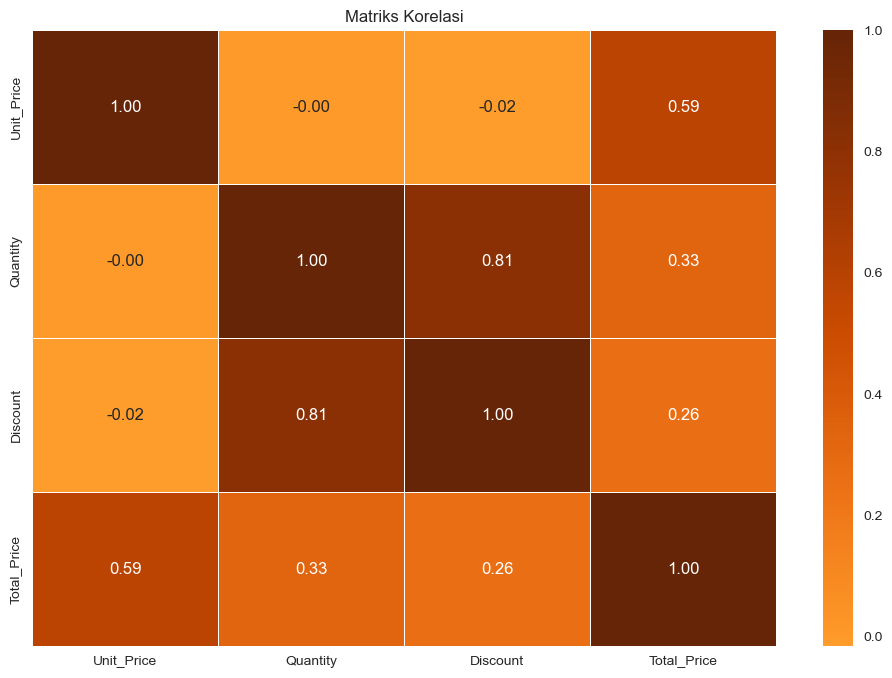

In [10]:
def plot_correlation_matrix(df):
    """
    Menampilkan matriks korelasi menggunakan heatmap.
    
    Parameters:
        df (DataFrame): DataFrame yang berisi data numerik.
    """
    numeric_cols = df.select_dtypes(include=['number'])  # Memilih kolom numerik
    correlation_matrix = numeric_cols.corr()  # Menghitung korelasi
    
    plt.figure(figsize=(12,8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="YlOrBr", linewidths=0.5, center=0)
    plt.title("Matriks Korelasi")
    plt.show()

plot_correlation_matrix(df_sales)

Dari heatmap matriks korelasi ini, ada beberapa insight penting mengenai hubungan antar variabel:
1. Korelasi yang Kuat
     - `Quantity` vs `Discount` (0.81) → Korelasi sangat kuat positif, artinya semakin tinggi jumlah barang yang dibeli, semakin besar diskon yang diberikan. Ini menunjukkan adanya strategi diskon berbasis kuantitas (misalnya, beli lebih banyak untuk mendapatkan diskon lebih besar).
2. Korelasi yang Sedang
     - `Unit_Price` vs `Total_Price` (0.59) → Korelasi cukup kuat positif, menunjukkan bahwa harga satuan berkontribusi secara signifikan terhadap total harga transaksi.
     - `Quantity` vs `Total_Price` (0.33) → Korelasi sedang positif, artinya jumlah barang yang dibeli berdampak pada total harga, tetapi tidak sekuat harga satuan.
3. Korelasi yang Lemah
     - `Discount` vs `Total_Price` (0.24) → Korelasi lemah positif, menunjukkan bahwa diskon tidak berpengaruh besar terhadap total harga. Ini bisa terjadi jika diskon hanya diberikan pada item tertentu atau jika diskon per unit kecil.
     - `Unit_Price` vs `Quantity` (-0.01) → Korelasi hampir nol, artinya harga satuan tidak memengaruhi jumlah barang yang dibeli. Ini bisa berarti bahwa pembeli tidak terlalu sensitif terhadap harga satuan dalam menentukan jumlah pembelian.
     - `Unit_Price` vs `Discount` (-0.03) → Korelasi sangat lemah negatif, artinya harga satuan tidak berkaitan dengan diskon yang diberikan.

**Insight:**
- Diskon sangat dipengaruhi oleh jumlah pembelian, yang menandakan strategi "beli lebih banyak, dapatkan diskon lebih besar".
- Harga satuan dan jumlah barang yang dibeli hampir tidak memiliki hubungan, sehingga kemungkinan ada faktor lain yang memengaruhi keputusan pembelian.
- Total harga lebih dipengaruhi oleh harga satuan dibandingkan jumlah barang atau diskon.

### **4.4. Visualisasi Data** (FIX)

#### **4.4.1. Analisis Diskon vs Kuantitas (Quantity vs Discount)** (REVISI)

Scatterplot dengan regresi ini menunjukkan hubungan antara jumlah barang yang dibeli (Quantity) dengan diskon yang diberikan (Discount). Tujuan dari analisis ini adalah untuk memvalidasi apakah ada strategi bulk discount, yaitu semakin banyak barang yang dibeli, semakin besar diskon yang diberikan.

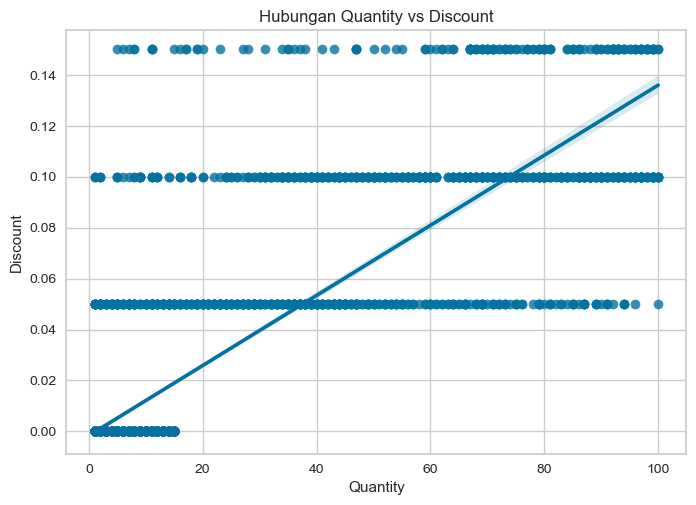

In [11]:
sns.regplot(x=df_sales['Quantity'], y=df_sales['Discount'])
plt.title("Hubungan Quantity vs Discount")
plt.show()

Dari hasil scatter plot diatas, terdapat beberapa poin yang berkaitan hubungan antara `Quantity` dengan `Discount`:
- Terdapat garis regresi dengan kemiringan positif yang menandakan bahwa secara umum, jumlah barang yang dibeli berkorelasi positif dengan diskon yang diberikan. Hal ini menunjukkan bahwa diskon memang meningkat seiring dengan bertambahnya jumlah pembelian.
- Poin data tampak tersebar pada beberapa level diskon tetap (misalnya di 0%, 5%, 10%, 15%). Hal ini mengindikasikan bahwa diskon diberikan berdasarkan tingkatan tertentu, bukan nilai yang terus berubah secara proporsional terhadap jumlah barang.
- Distribusi `Discount` pada Jumlah Pembelian Kecil dan Besar. Untuk jumlah barang kecil (di bawah 10 unit), mayoritas transaksi memiliki diskon 0% atau sangat rendah. Untuk jumlah barang besar (lebih dari 50 unit), diskon terlihat lebih tinggi dan stabil di sekitar 10% hingga 15%.

***Insight:***
- Terdapat strategi bulk discount, pelanggan yang membeli dalam jumlah besar lebih mungkin mendapatkan diskon lebih tinggi.
- Diskon diberikan dalam tingkatan tertentu, bukan dalam skala kontinu.

Boxplot ini menggambarkan distribusi diskon berdasarkan kategori jumlah barang yang dibeli, yaitu Low, Medium, dan High. Tujuan dari analisis ini adalah untuk memahami bagaimana diskon diberikan pada kelompok jumlah pembelian yang berbeda.

In [12]:
df_sales.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

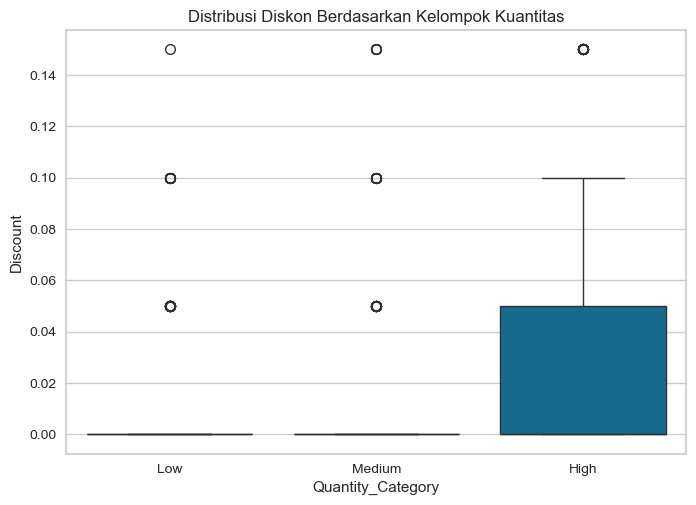

In [13]:
df_sales['Quantity_Category'] = pd.cut(df_sales['Quantity'], bins=[0, 5, 10, 50], labels=['Low', 'Medium', 'High'])

sns.boxplot(x=df_sales['Quantity_Category'], y=df_sales['Discount'])
plt.title("Distribusi Diskon Berdasarkan Kelompok Kuantitas")
plt.show()

Dari hasil boxplot diatas, terdapat beberapa poin yang berkaitan hubungan antara `Quantity_Category` dengan `Discount`:
- Pemberian Diskon Signifikan pada Kategori "High". Kategori Low dan Medium memiliki nilai median diskon yang hampir nol, menunjukkan bahwa mayoritas transaksi dalam kategori ini tidak mendapatkan diskon. Pada kategori High, distribusi diskon lebih luas, dengan median yang lebih tinggi dan adanya interkuartil range (IQR) yang jelas, menandakan bahwa pelanggan yang membeli dalam jumlah besar lebih sering menerima diskon.
- Terdapat beberapa outlier di kategori Low dan Medium, yang berarti ada transaksi dengan jumlah kecil namun tetap mendapatkan diskon tinggi (misalnya 10%-15%). Hal ini kemungkinan disebabkan oleh promo khusus, loyalitas pelanggan, atau kategori produk tertentu yang memiliki kebijakan diskon berbeda.
- Variasi Diskon pada Kategori "High". Kategori High memiliki rentang diskon yang lebih lebar, menunjukkan bahwa meskipun ada kebijakan "beli lebih banyak, dapat diskon lebih besar", ada perbedaan besar dalam jumlah diskon yang diberikan.

***Insight:***
- Diskon lebih banyak diberikan pada kategori High, memperkuat hipotesis strategi "bulk discount".
- Beberapa transaksi di kategori Low dan Medium tetap mendapatkan diskon tinggi, menandakan adanya kebijakan diskon khusus.

#### **4.4.2. Analisis Harga Satuan vs Total Harga (Unit Price vs Total Price)** (FIX)

Scatterplot ini menunjukkan hubungan antara harga satuan (Unit Price) dan total harga (Total Price) dalam transaksi. Tujuan analisis ini adalah untuk memahami apakah harga satuan memiliki kontribusi besar terhadap total transaksi atau apakah ada faktor lain seperti kuantitas yang lebih berpengaruh.

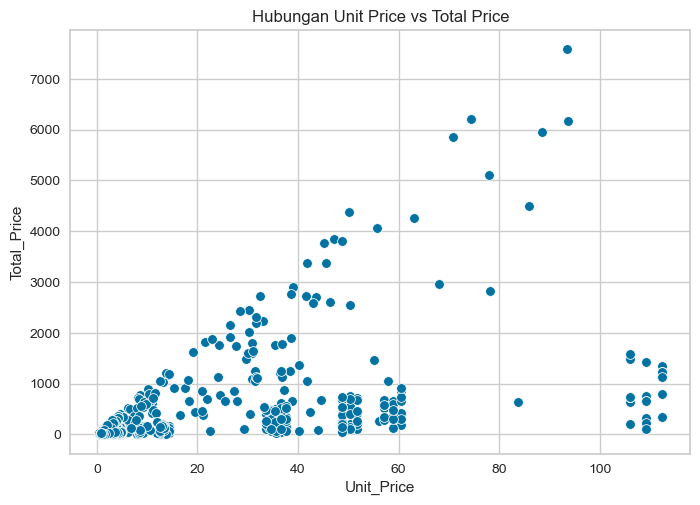

In [14]:
sns.scatterplot(x=df_sales['Unit_Price'], y=df_sales['Total_Price'])
plt.title("Hubungan Unit Price vs Total Price")
plt.show()

Dari hasil boxplot diatas, terdapat beberapa poin yang berkaitan hubungan antara `Unit_Price` dengan `Total_Price`:
- Pola Positif Namun Tidak Linear. Secara umum, ada tren bahwa semakin tinggi Unit Price, semakin tinggi pula Total Price. Namun, pola tidak selalu linear, yang menandakan adanya pengaruh kuantitas pembelian terhadap total harga.
- Kelompok Transaksi Berbeda. Mayoritas transaksi terkonsentrasi di Unit Price rendah (di bawah 50), dengan Total Price yang variatif. Ini menunjukkan bahwa produk dengan harga satuan rendah mendominasi penjualan. Terdapat transaksi dengan Unit Price tinggi (di atas 80), tetapi Total Price lebih rendah dibanding beberapa produk dengan Unit Price lebih murah. Hal ini bisa terjadi jika produk mahal dibeli dalam jumlah kecil, sedangkan produk murah dibeli dalam jumlah besar.
- Outlier dengan Total Price Sangat Tinggi. Beberapa titik menunjukkan transaksi dengan Total Price sangat tinggi meskipun Unit Price tidak terlalu besar. Ini mengindikasikan adanya pembelian dalam jumlah sangat besar untuk produk dengan harga satuan sedang. Sebaliknya, ada produk dengan Unit Price tinggi tetapi Total Price rendah, yang berarti produk ini mungkin tidak dibeli dalam jumlah besar.

***Insight:***
- Harga satuan bukan satu-satunya faktor utama dalam total transaksi, karena ada variasi besar dalam jumlah pembelian.
- Total Price lebih dipengaruhi oleh kombinasi antara Unit Price dan Quantity, bukan hanya Unit Price saja.

#### **4.4.3. Analisis Peran Diskon terhadap Total Harga** (FIX)

Scatterplot ini menunjukkan hubungan antara diskon (Discount) dan total harga (Total Price) dalam transaksi. Tujuan analisis ini adalah untuk memahami apakah diskon memiliki dampak nyata terhadap total harga yang dibayarkan oleh pelanggan.

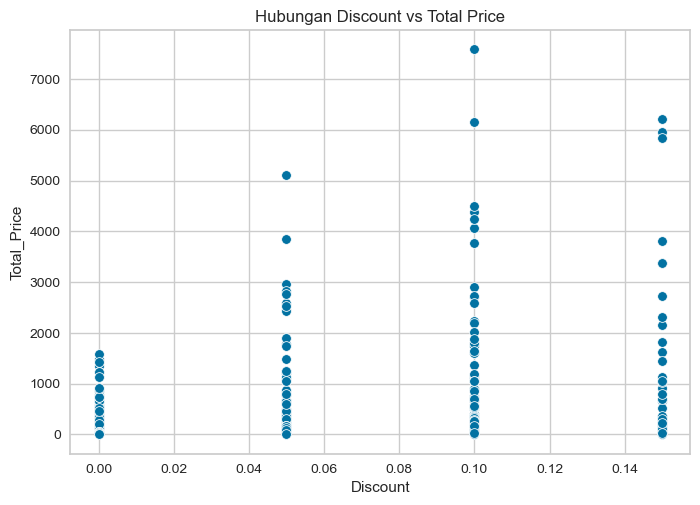

In [15]:
sns.scatterplot(x=df_sales['Discount'], y=df_sales['Total_Price'])
plt.title("Hubungan Discount vs Total Price")
plt.show()

Dari hasil scatterplot diatas, terdapat beberapa poin yang berkaitan hubungan antara `Discount` dengan `Total_Price`:
- Diskon Tidak Selalu Berhubungan Langsung dengan Total Price. Sebaran data menunjukkan bahwa transaksi dengan diskon tinggi tidak selalu menghasilkan total harga tinggi. Sebaliknya, ada transaksi dengan diskon rendah atau tanpa diskon yang memiliki total harga tinggi, yang berarti faktor lain seperti kuantitas dan harga produk juga berperan penting.
- Beberapa Tingkat Diskon Umum. Tampaknya hanya ada beberapa nilai diskon spesifik yang sering digunakan (misalnya sekitar 0.04, 0.10, dan 0.14). Hal ini bisa menunjukkan bahwa perusahaan menerapkan kebijakan diskon dalam tier tertentu dan tidak secara variatif untuk setiap transaksi.
- Transaksi dengan Total Price Sangat Tinggi Muncul di Berbagai Level Diskon. Beberapa transaksi dengan Total Price tinggi terjadi pada berbagai tingkat diskon, termasuk diskon kecil (0.04) maupun besar (0.10 dan 0.14). Hal ini mengindikasikan bahwa total harga lebih dipengaruhi oleh jumlah barang yang dibeli dan harga produk, bukan hanya oleh diskon itu sendiri.

***Insight:***
- Diskon bukan satu-satunya faktor utama yang menentukan total harga transaksi.
- Sebaran data menunjukkan bahwa diskon mungkin lebih berperan dalam strategi pemasaran dibandingkan dampak langsung pada total harga transaksi.

Boxplot ini menggambarkan distribusi total harga (Total Price) berdasarkan kategori diskon (Low, Medium, High). Analisis ini bertujuan untuk memahami apakah kategori diskon memiliki pengaruh yang signifikan terhadap total harga transaksi.

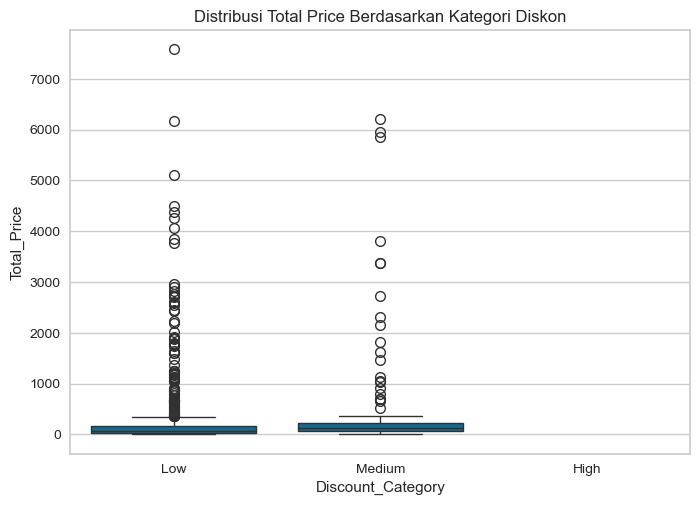

In [16]:
df_sales['Discount_Category'] = pd.cut(df_sales['Discount'], bins=[0, 0.1, 0.3, 1], labels=['Low', 'Medium', 'High'])

sns.boxplot(x=df_sales['Discount_Category'], y=df_sales['Total_Price'])
plt.title("Distribusi Total Price Berdasarkan Kategori Diskon")
plt.show()

Dari hasil boxplot diatas, terdapat beberapa poin yang berkaitan hubungan antara `Discount_Category` dengan `Total_Price`:
- Sebaran Total Price Mirip di Semua Kategori Diskon. Ketiga kategori diskon (Low, Medium, dan High) memiliki distribusi yang hampir sama dengan median yang relatif rendah dan banyak outlier. Hal ini menunjukkan bahwa diskon tidak selalu berkontribusi besar terhadap peningkatan total harga.
- Mayoritas Transaksi Berada di Kisaran Harga Rendah. Boxplot menunjukkan bahwa IQR (interquartile range) atau distribusi utama total harga relatif kecil, terutama pada kategori Low dan Medium. Hanya sebagian kecil transaksi yang mencapai total harga tinggi, yang kemungkinan besar dipengaruhi oleh jumlah unit yang dibeli daripada besaran diskon.
- Outlier dengan Total Price Sangat Tinggi di Semua Kategori. Terlihat ada beberapa transaksi dengan total harga yang jauh lebih tinggi dibandingkan dengan mayoritas transaksi lainnya di semua kategori diskon. Hal ini mengindikasikan bahwa beberapa pelanggan melakukan pembelian dalam jumlah besar, terlepas dari kategori diskon yang diberikan.
- Kategori "High" Kurang Representatif. Tampaknya kategori diskon "High" memiliki jumlah data yang lebih sedikit atau bahkan tidak ditampilkan di boxplot ini. Hal ini bisa menunjukkan bahwa diskon besar jarang diberikan, atau ada batasan tertentu dalam dataset yang menyebabkan kategori ini memiliki sedikit sampel.

***Insight:***
- Tidak ada hubungan yang jelas antara kategori diskon dengan total harga transaksi.
- Faktor utama yang memengaruhi total harga kemungkinan adalah jumlah unit yang dibeli, bukan besarnya diskon.

#### **4.4.4. Analisis Faktor yang Mempengaruhi Jumlah Pembelian (Quantity)** (FIX)

Scatterplot ini menggambarkan hubungan antara harga satuan (Unit Price) dan jumlah barang yang dibeli (Quantity). Tujuan analisis ini adalah untuk mengetahui apakah harga satuan suatu produk berpengaruh terhadap jumlah barang yang dibeli oleh pelanggan.

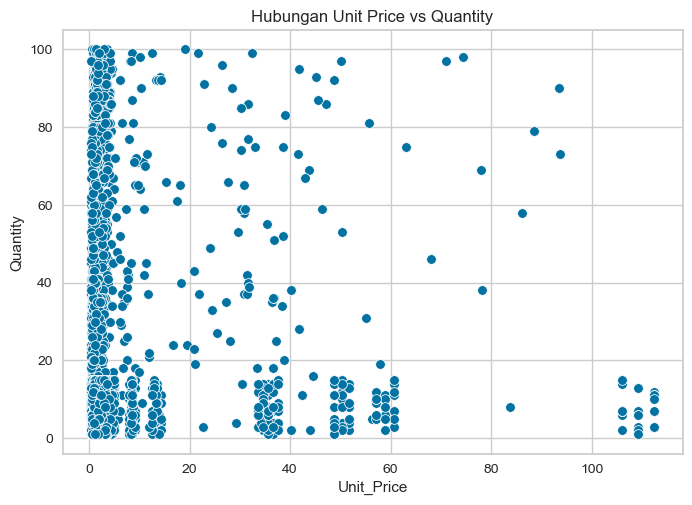

In [17]:
sns.scatterplot(x=df_sales['Unit_Price'], y=df_sales['Quantity'])
plt.title("Hubungan Unit Price vs Quantity")
plt.show()

Dari hasil scatterplot diatas, terdapat beberapa poin yang berkaitan hubungan antara `Unit_Price` dengan `Quantity`:
- Mayoritas Pembelian Terjadi pada Produk dengan Harga Satuan Rendah. Terlihat bahwa sebagian besar titik data terkonsentrasi di Unit Price yang rendah (di bawah 20). Hal ini menunjukkan bahwa pelanggan cenderung membeli produk dengan harga satuan yang lebih murah dalam jumlah yang lebih banyak.
- Produk dengan Harga Mahal Dibeli dalam Jumlah Kecil. Untuk produk dengan Unit Price di atas 50, jumlah barang yang dibeli umumnya lebih rendah. Hal ini masuk akal karena harga produk yang lebih mahal cenderung mengurangi kuantitas yang dibeli.
- Pola Tidak Sepenuhnya Linear. Meskipun ada tren bahwa harga tinggi mengurangi jumlah pembelian, tetap ada beberapa produk dengan harga satuan rendah tetapi jumlah pembeliannya juga rendah. Hal ini mengindikasikan bahwa selain harga, faktor lain seperti permintaan produk, kebutuhan pelanggan, dan strategi pemasaran juga memengaruhi jumlah pembelian.
- Beberapa Produk dengan Harga Murah Dibeli dalam Jumlah Sangat Besar. Terdapat beberapa outlier di mana produk dengan harga satuan rendah dibeli dalam jumlah yang sangat tinggi (di atas 80–100 unit). Hal ini bisa terjadi pada produk-produk yang bersifat konsumsi massal, barang kebutuhan pokok, atau produk dengan diskon besar.

***Insight:***
- Terdapat korelasi negatif antara harga satuan dan jumlah pembelian, di mana produk dengan harga lebih rendah cenderung dibeli dalam jumlah lebih banyak.
- Produk dengan harga mahal memiliki kuantitas pembelian lebih rendah, tetapi ada kemungkinan faktor lain seperti brand dan kebutuhan spesifik yang mempengaruhi keputusan pembelian.

Bar chart ini menunjukkan rata-rata jumlah pembelian (Quantity) untuk setiap kategori produk. Tujuan utama dari analisis ini adalah untuk memahami apakah harga satuan suatu produk memengaruhi jumlah barang yang dibeli, serta bagaimana perbedaannya antar kategori produk.

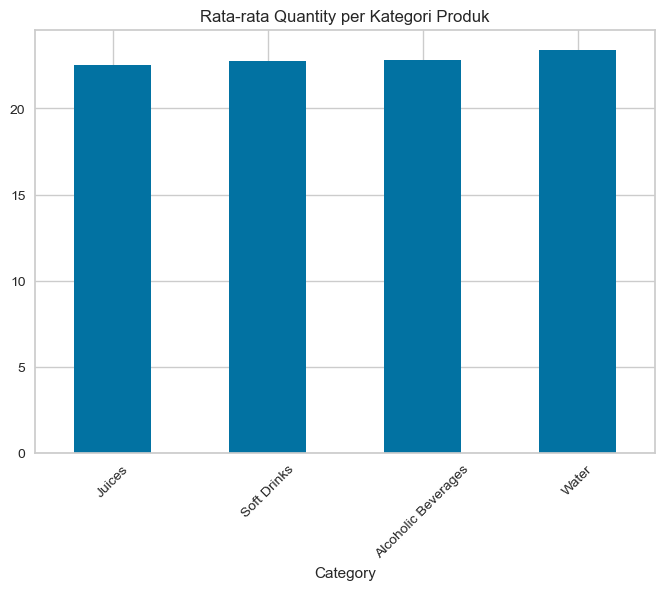

In [18]:
df_sales.groupby('Category')['Quantity'].mean().sort_values().plot(kind='bar')
plt.title("Rata-rata Quantity per Kategori Produk")
plt.xticks(rotation=45)
plt.show()


Dari hasil bar chart diatas, terdapat beberapa poin yang berkaitan hubungan antara `Category` dengan `Quantity`:
- Rata-rata Quantity yang Konsisten antar Kategori. Kategori Soft Drinks, Alcoholic Beverages, Water, dan Juices memiliki rata-rata jumlah pembelian yang hampir sama, berada di kisaran 22 unit per transaksi.  Hal ini menunjukkan bahwa dalam kategori minuman, permintaan relatif stabil tanpa perbedaan signifikan antar jenis minuman.
- Tidak Ada Indikasi Hubungan Kuat antara Harga dan Kuantitas. Jika harga satuan memiliki pengaruh besar terhadap jumlah barang yang dibeli, maka kita mungkin akan melihat perbedaan yang mencolok antar kategori, terutama pada minuman dengan harga lebih tinggi seperti Alcoholic Beverages. Namun, karena rata-rata pembelian hampir seragam, ini menunjukkan bahwa faktor lain seperti kebutuhan pelanggan, preferensi, dan pola konsumsi kemungkinan lebih berpengaruh dibandingkan harga satuan itu sendiri.
- Kategori Minuman Memiliki Permintaan yang Relatif Tinggi. Semua kategori yang dianalisis adalah jenis minuman, dan jumlah pembelian rata-ratanya cukup tinggi. Hal ini bisa disebabkan oleh sifat produk yang dikonsumsi secara rutin dan sering dibeli dalam jumlah banyak, misalnya untuk stok di rumah atau kebutuhan acara.

***Insight:***
- Tidak ditemukan hubungan yang jelas antara harga satuan dan jumlah pembelian, karena semua kategori memiliki rata-rata pembelian yang hampir sama.
- Faktor lain seperti kebutuhan dasar, preferensi pelanggan, dan pola konsumsi lebih mungkin memengaruhi jumlah pembelian dalam kategori minuman.

# **5. Data Preprocessing** (FIX)

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

---

### **5.1. Menangani Data Kosong (Missing Values)** (FIX)

Untuk menghitung jumlah total nilai kosong (missing values) dalam dataframe `df_sales`, kita akan menggunakan `df_sales.isnull().sum().sum()`.

In [19]:
print("Jumlah Data Kosong:", df_sales.isnull().sum().sum())

Jumlah Data Kosong: 2449


Terlihat bahwa tidak terdapat jumlah data kosong pada dataframe `df_sale` sehingga bisa langsung ke tahap berikutnya.

### **5.2. Menghapus Data Duplikat** (FIX)

Dalam tahap data preprocessing, penting untuk memeriksa apakah terdapat data duplikat dalam dataset. Data duplikat dapat menyebabkan bias dalam analisis dan model machine learning, karena informasi yang sama dihitung lebih dari sekali. Oleh karena itu kita akan menggunakan fungsi `duplicated().sum()` untuk memeriksanya.

In [20]:
print("Jumlah data duplikat:", df_sales.duplicated().sum())

Jumlah data duplikat: 0


Hasil menunjukkan bahwa jumlah data duplikat sebanyak 0 data, maka tidak ada data yang perlu dihapus.

### **5.3. Normalisasi atau Standarisasi** (FIX)

Normalisasi dan standarisasi adalah dua teknik penting yang digunakan untuk mengubah skala data sehingga lebih optimal untuk analisis dan model machine learning.
- Normalisasi (Min-Max Scaling) digunakan untuk merubah nilai data dalam rentang tertentu, biasanya antara 0 dan 1. Ini berguna ketika fitur memiliki rentang nilai yang sangat berbeda atau terdapat outlier yang tidak ekstrem.
- Standarisasi (Z-score Scaling) digunakan untuk mengubah data agar memiliki distribusi dengan rata-rata 0 dan standar deviasi 1. Ini lebih cocok untuk algoritma yang sensitif terhadap distribusi data, seperti regresi linear dan PCA.

In [21]:
# mengecek 1 baris pertama
df_sales.head(1)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Discount_Category
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7,0.0,7.28,Bremen,2021-02-17,Medium,NaN


In [22]:
# Inisialisasi fungsi normalisasi dan standarisasi
min_max_scaler = MinMaxScaler() # normalisasi
standard_scaler = StandardScaler() # standarisasi

Normalisasi pada kolom `Quantity` menggunakan `MinMaxScaler()`, yang akan mengubah nilai `Quantity` dalam rentang 0 hingga 1.

In [23]:
# Normalisasi data
df_sales_normalized = df_sales.copy()
df_sales_normalized[['Quantity']] = min_max_scaler.fit_transform(df_sales_normalized[['Quantity']])
df_sales_normalized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Discount_Category
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,0.060606,0.00,7.28,Bremen,2021-02-17,Medium,NaN
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,0.454545,0.10,29.39,Sachsen-Anhalt,2023-04-15,High,Low
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,2.90,0.727273,0.05,201.11,Sachsen,2022-06-20,NaN,Low
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,0.292929,0.05,76.38,Schleswig-Holstein,2021-09-07,High,Low
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,0.020202,0.00,2.73,Hessen,2023-04-28,Low,NaN


Standarisasi pada `Total_Price` dan `Unit_Price` menggunakan `StandardScaler()`, yang akan mengubah skala fitur agar memiliki distribusi standar.

In [24]:
# Standarisasi data
df_sales_standardized = df_sales_normalized.copy()
df_sales_standardized[['Total_Price', 'Unit_Price']] = standard_scaler.fit_transform(df_sales_standardized[['Total_Price', 'Unit_Price']])
df_sales_standardized.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Discount_Category
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.332318,0.060606,0.00,-0.262481,Bremen,2021-02-17,Medium,NaN
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.355336,0.454545,0.10,-0.212127,Sachsen-Anhalt,2023-04-15,High,Low
2,ORD742327,CUS3123,B2B,Fritz-Kola,Soft Drinks,-0.202580,0.727273,0.05,0.178960,Sachsen,2022-06-20,NaN,Low
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.217925,0.292929,0.05,-0.105109,Schleswig-Holstein,2021-09-07,High,Low
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.341385,0.020202,0.00,-0.272844,Hessen,2023-04-28,Low,NaN


Setelah normalisasi dan standisasi diterapkan, perubahan skala data tersimpan dalam dua dataframe terpisah:
- `df_sales_normalized` menyimpan hasil normalisasi, di mana kolom `Quantity` telah diubah ke rentang antara 0 dan 1.
- `df_sales_standardized` menyimpan hasil standarisasi, di mana `Total_Price` dan `Unit_Price` telah diubah agar memiliki rata-rata 0 dan standar deviasi 1.

### **5.4. Deteksi dan Penanganan Outlier** (FIX)

Pada tahap ini, kita akan melakukan deteksi dan penanganan outlier pada data numerik di `df_sales_standardized`. Outlier adalah nilai yang jauh berbeda dari data lain dalam distribusi dan dapat memengaruhi hasil analisis atau kinerja model machine learning. Oleh karena itu, deteksi dan penanganan outlier menjadi langkah penting dalam preprocessing data.

Pertama-tama, kita akan mengidentifikasi kolom numerik dalam DataFrame `df_sales_standardized`. `num_columns` akan menyimpan nama-nama kolom data numerik dari DataFrame `df_sales_standardized`.

In [25]:
num_columns = df_sales_standardized.select_dtypes(include=['number']).columns

Lalu, kita perlu menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga) serta IQR (Interquartile Range) sebagai selisih antara Q3 dan Q1. Penentuan batas bawah dan atas dilakukan untuk mendeteksi outlier.

In [26]:
# Hitung Q1, Q3, dan IQR untuk kolom numerik
Q1 = df_sales_standardized[num_columns].quantile(0.25)
Q3 = df_sales_standardized[num_columns].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Sebelum menghapus outlier, kita akan menggunakan fungsi `plot_boxplots()` untuk melihat distribusi awal data secara visual.

In [27]:
def plot_boxplots(df, title="Box Plot Data Numerik"):
     """
     Menampilkan boxplot untuk setiap kolom numerik dalam dataframe.

     Parameters:
     df (DataFrame): Dataframe yang akan dianalisis.
     title (str): Judul utama dari plot.
     """
     custom_palette = sns.color_palette("YlOrBr", 3)  # Palet warna
     num_columns = df.select_dtypes(include=['number']).columns  # Ambil kolom numerik
     num_plots = len(num_columns)

     if num_plots == 0:
          print("Tidak ada data numerik dalam dataframe.")
          return

     # Tentukan ukuran grid subplot
     rows = (num_plots // 2) + (num_plots % 2)
     fig, axes = plt.subplots(rows, 2, figsize=(12, rows * 4))

     # Flatten axes jika hanya satu baris
     if rows == 1:
          axes = axes.reshape(1, -1)

     # Iterasi untuk setiap kolom numerik
     for i, col in enumerate(num_columns):
          row, col_index = divmod(i, 2)
          sns.boxplot(x=df[col], color=custom_palette[1], ax=axes[row, col_index])
          axes[row, col_index].set_title(f'Box Plot {col}')
          axes[row, col_index].set_xlabel(col)
          axes[row, col_index].grid(axis='x', linestyle='--', alpha=0.7)

     # Hapus subplot kosong jika jumlahnya ganjil
     if num_plots % 2 != 0:
          fig.delaxes(axes[-1, -1])

     plt.suptitle(title)
     plt.tight_layout()
     plt.show()

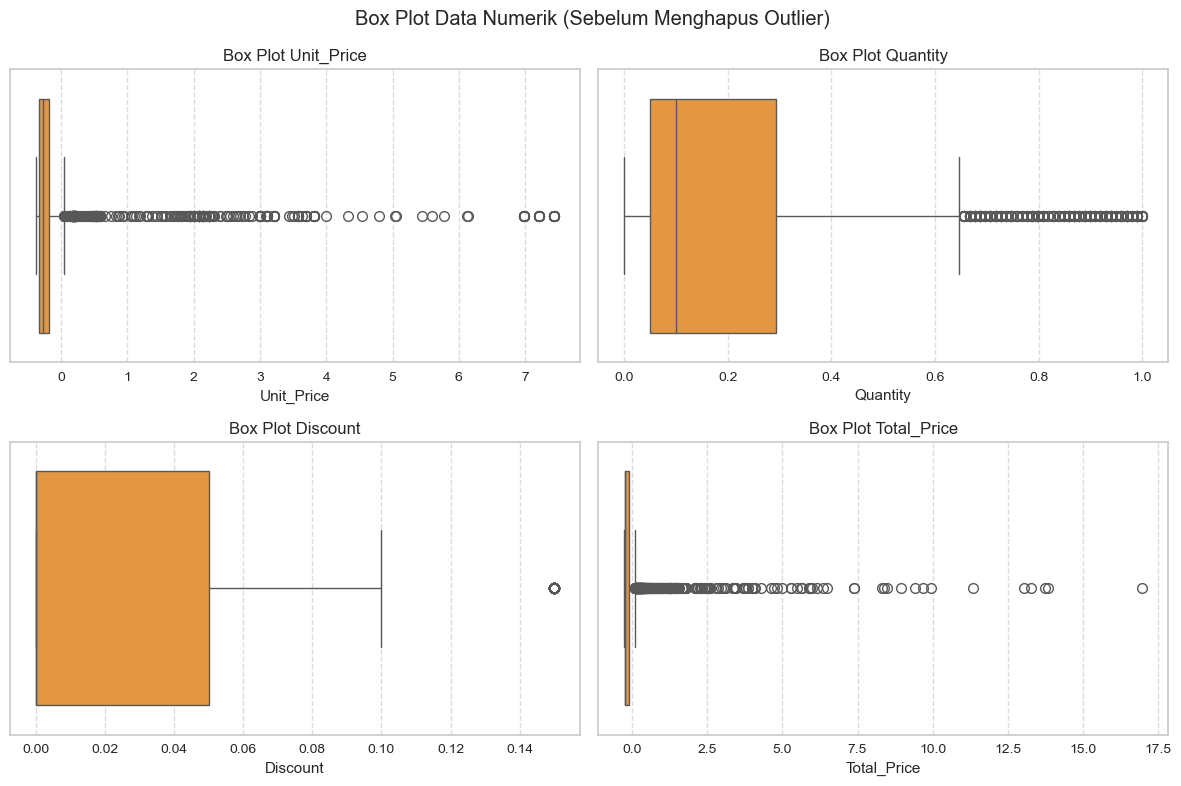

Hasil dari boxplot diatas, dapat disimpulkan bahwa jumlah data 
sebelum dilakukan penghapusan outlier sebanyak 3000 data


In [28]:
plot_boxplots(df_sales_standardized, title="Box Plot Data Numerik (Sebelum Menghapus Outlier)")

print("Hasil dari boxplot diatas, dapat disimpulkan bahwa jumlah data \nsebelum dilakukan penghapusan outlier sebanyak", df_sales_standardized.shape[0], "data")

In [29]:
# Menghapus outlier pada kolom numerik
mask = ~((df_sales_standardized[num_columns] < lower_bound) | (df_sales_standardized[num_columns] > upper_bound)).any(axis=1)
df_sales_cleaned = df_sales_standardized[mask]

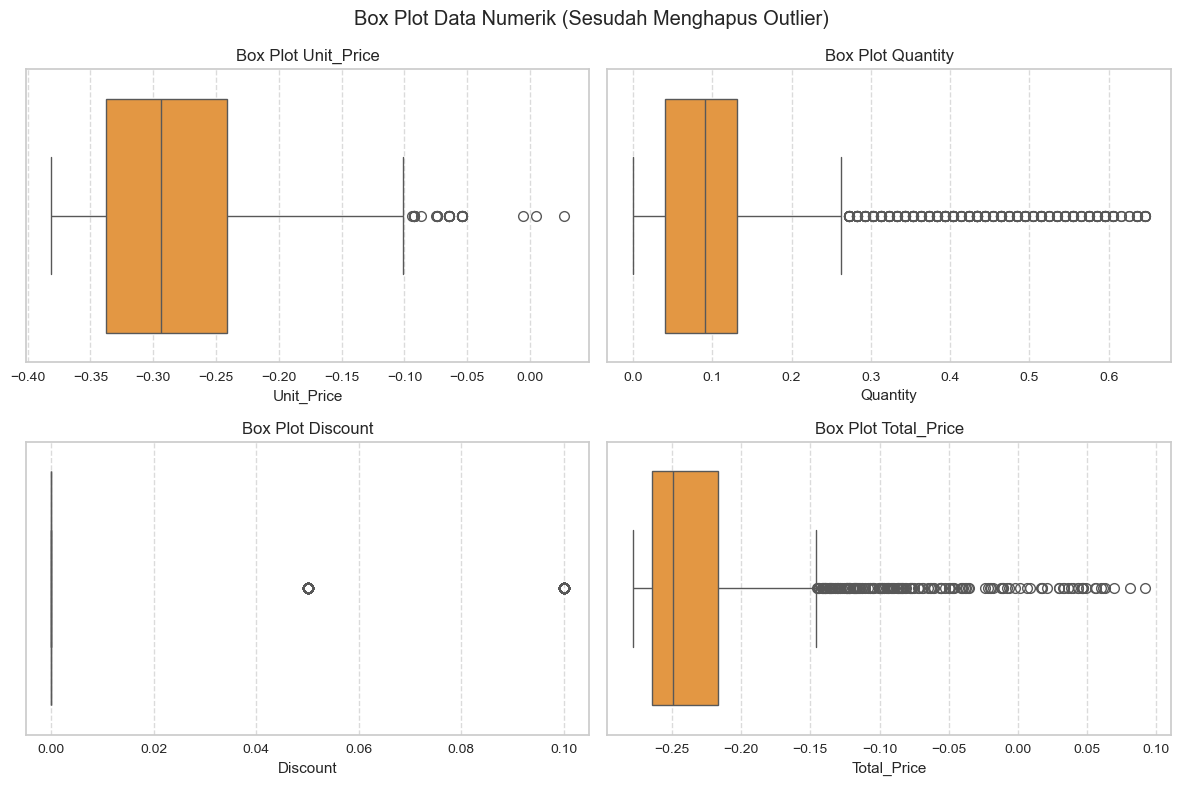

Hasil dari boxplot diatas, dapat disimpulkan bahwa jumlah data 
setelah dilakukan penghapusan outlier sebanyak 2244 data


In [30]:
plot_boxplots(df_sales_cleaned, title="Box Plot Data Numerik (Sesudah Menghapus Outlier)")

print("Hasil dari boxplot diatas, dapat disimpulkan bahwa jumlah data \nsetelah dilakukan penghapusan outlier sebanyak", df_sales_cleaned.shape[0], "data")

Dari hasil penhapusan outlier untuk variabel `Unit_Price`, `Quantity`, `Discount`, dan `Total_Price`, terdapat beberapa insight yang dapat diambil:
1. Boxplot `Unit_Price`
     - Sebelum: Terdapat banyak outlier di sisi kanan (nilai tinggi).
     - Sesudah: Beberapa outlier tetap ada, tetapi jumlahnya lebih sedikit, menunjukkan bahwa hanya outlier ekstrem yang dihapus.
2. Boxplot `Quantity`
     - Sebelum: Distribusi sangat lebar dengan banyak titik outlier di ujung kanan.
     - Sesudah: Masih ada beberapa outlier, tetapi distribusinya menjadi lebih terkonsentrasi di bagian tengah.
3. Boxplot `Discount`
     - Sebelum: Beberapa outlier terlihat di ujung kanan.
     - Sesudah: Sebagian besar distribusi tetap sama, tetapi beberapa outlier tinggi tampaknya telah dihapus.
4. Boxplot `Total_Price`
     - Sebelum: Banyak outlier di bagian kanan yang menunjukkan nilai total yang sangat tinggi.
     - Sesudah: Beberapa outlier tinggi masih ada, tetapi jumlahnya lebih sedikit dibandingkan sebelumnya.

**Insight:**
- Penghapusan outlier membantu mengurangi skala ekstrem tanpa menghilangkan terlalu banyak data.
- Sebagian besar distribusi tetap terjaga, terutama pada fitur `Discount`.

### **5.5. Encoding Data Kategorikal** (FIX)

Pada dataset `df_sales_cleaned`, terdapat beberapa fitur kategorikal, yaitu:
- `Customer_Type` (Jenis pelanggan)
- `Region` (Wilayah penjualan)
- `Product` (Nama produk)
- `Category` (Kategori produk)

Fitur-fitur ini masih dalam bentuk teks (string), yang tidak dapat langsung digunakan dalam model machine learning berbasis numerik seperti regresi linier, decision tree, atau neural network. Oleh karena itu, diperlukan proses encoding untuk mengonversinya menjadi format numerik.

In [31]:
# Inisialisasi label encoder
label_encoder = LabelEncoder()

df_sales_labeled = df_sales_cleaned.copy()

# Label Encoding
df_sales_labeled[['Customer_Type', 'Region', 'Product', 'Quantity_Category']] = df_sales_cleaned[['Customer_Type', 'Region', 'Product', 'Quantity_Category']].apply(label_encoder.fit_transform)

# One Hot Encoding
df_sales_encoded = pd.get_dummies(df_sales_labeled, columns=['Category'])
df_sales_encoded.head()

,Order_ID,Customer_ID,Customer_Type,Product,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Discount_Category,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,ORD697566,CUS6363,1,5,-0.332318,0.060606,0.00,-0.262481,4,2021-02-17,2,NaN,False,False,True,False
1,ORD1118443,CUS7797,0,32,-0.355336,0.454545,0.10,-0.212127,13,2023-04-15,0,Low,False,False,False,True
3,ORD1437128,CUS6393,0,20,-0.217925,0.292929,0.05,-0.105109,14,2021-09-07,0,Low,False,False,True,False
4,ORD562794,CUS4090,1,29,-0.341385,0.020202,0.00,-0.272844,6,2023-04-28,1,NaN,False,False,False,True
5,ORD2320519,CUS5936,1,2,-0.306510,0.030303,0.00,-0.266216,4,2023-11-01,1,NaN,True,False,False,False


Proses Encoding:
1. `Label Encoding`
     - Fitur `Customer_Type`, `Region`, dan `Product` dikonversi ke nilai numerik menggunakan LabelEncoder.
     - Label encoding mengubah setiap kategori unik menjadi angka (misalnya, "B2C" → 0, "B2B" → 1).
     - Kekurangan metode: model dapat menganggap kategori yang lebih tinggi memiliki bobot lebih besar, padahal sebenarnya tidak memiliki urutan hierarkis.
2. `One-Hot Encoding`
     - Fitur `Category` dikonversi menggunakan One-Hot Encoding.
     - Setiap kategori unik dibuatkan kolom sendiri, dengan nilai 1 jika data termasuk dalam kategori tersebut dan 0 jika tidak.
     - Keuntungan metode: tidak ada hubungan ordinal antar kategori, sehingga model tidak salah dalam menginterpretasikan hubungan antar nilai.

**Insight:**
- Setelah encoding, DataFrame `df_sales_encoded` kini hanya berisi nilai numerik, siap untuk dimasukkan ke dalam model machine learning.
- Kolom `Customer_Type`, `Region`, dan `Product` telah berubah menjadi angka hasil label encoding.
- Kolom `Category` telah dipecah menjadi beberapa kolom biner berdasarkan kategori uniknya.

# **6. Pembangunan Model Clustering**

### **6.1. Pembangunan Model Clustering** (FIX)

Pada tahap ini, kita akan membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Algoritma clustering yang sering digunakan sebagai berikut.
- `K-Means`: Cocok untuk dataset dengan batas klaster yang jelas dan ukuran klaster seragam.
- `DBSCAN`: Cocok untuk dataset dengan outlier atau klaster dengan bentuk yang tidak beraturan.
- `Hierarchical Clustering`: Berguna untuk memahami struktur hierarki antar data.

Disini, kita akan memulai dengan `K-Means` karena cocok untuk dataset transaksi yang memiliki pola berbasis jumlah transaksi dan durasi transaksi.

---

DataFrame `df_sales_encoded` memiliki banyak kolom, termasuk variabel numerik seperti harga dan jumlah, serta variabel hasil encoding dari kategori produk. Tidak semua kolom ini relevan terhadap analisis yang akan dibuat. Oleh karena itu, kita akan menentukan beberapa fitur sebagai berikut.

In [32]:
features = [
               'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 
               'Category_Alcoholic Beverages', 'Category_Juices', 
               'Category_Soft Drinks', 'Category_Water'
          ]
X = df_sales_encoded[features]
X

,Unit_Price,Quantity,Discount,Total_Price,Category_Alcoholic Beverages,Category_Juices,Category_Soft Drinks,Category_Water
0,-0.332318,0.060606,0.00,-0.262481,False,False,True,False
1,-0.355336,0.454545,0.10,-0.212127,False,False,False,True
3,-0.217925,0.292929,0.05,-0.105109,False,False,True,False
4,-0.341385,0.020202,0.00,-0.272844,False,False,False,True
5,-0.306510,0.030303,0.00,-0.266216,True,False,False,False
...,...,...,...,...,...,...,...,...
2995,-0.243733,0.101010,0.00,-0.221191,False,True,False,False
2996,-0.285584,0.000000,0.00,-0.275167,False,False,False,True
2997,-0.319065,0.000000,0.00,-0.276260,False,False,False,True
2998,-0.339293,0.191919,0.05,-0.238386,False,False,False,True


**Insight:**
- Setelah pemilihan fitur, dataset X kini hanya berisi kolom-kolom yang dianggap relevan dengan analisis yang akan dilakukan.
- Dengan membatasi fitur hanya pada harga, jumlah, diskon, dan kategori produk, model dapat lebih fokus dalam menemukan pola tanpa terganggu oleh variabel yang kurang berpengaruh. Selain itu, pemilihan fitur yang tepat juga membantu meningkatkan efisiensi model, mengurangi kompleksitas komputasi, serta menghindari overfitting akibat terlalu banyak fitur yang tidak diperlukan.

Dalam metode clustering menggunakan K-Means, salah satu langkah penting adalah menentukan jumlah cluster (k) yang optimal. Untuk menentukan nilai k yang optimal, digunakan Elbow Method, yang menganalisis distortion score (jumlah kuadrat jarak antara titik data dengan centroid cluster). Distortion score yang lebih rendah menunjukkan bahwa titik-titik data lebih dekat dengan centroidnya, sehingga cluster lebih kompak.

Pada tahap ini, model K-Means diinisialisasi tanpa parameter awal, dan KElbowVisualizer dari Yellowbrick digunakan untuk mencari jumlah cluster optimal (k) sebelum membangun model K-Means.

d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default 

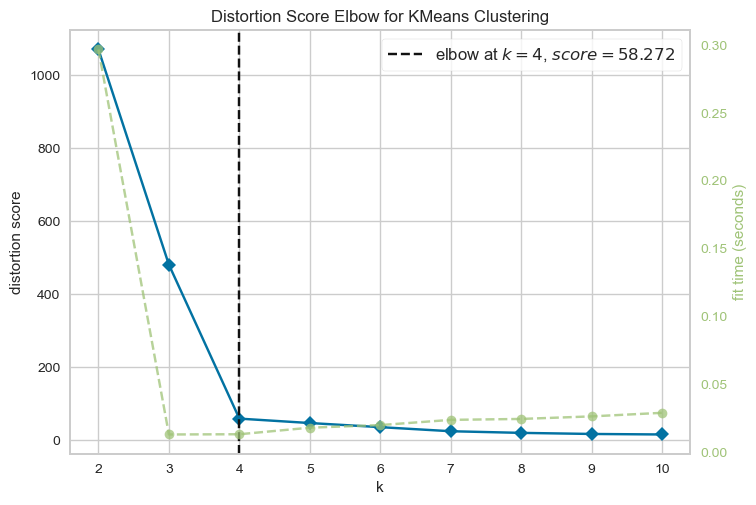

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow
visualizer = KElbowVisualizer(kmeans, k=(2, 11)) # Untuk menentukan jumlah cluster optimal

# Fit visualizer dengan data
visualizer.fit(X) # Untuk menemukan jumlah cluster optimal

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Hasil analisis menghasilkan grafik elbow, yang menunjukkan perubahan distortion score seiring bertambahnya jumlah cluster k. Dari grafik, terlihat bahwa terjadi perubahan signifikan pada k = 4, di mana setelah titik ini, penurunan distortion score mulai melambat. Ini disebut sebagai "elbow point", yang menunjukkan jumlah cluster optimal.

Dari grafik, kita bisa menyimpulkan bahwa jumlah cluster optimal untuk dataset ini adalah 4 (k = 4) dengan distortion score 49.070.
- Nilai ini dipilih karena setelah titik ini, penurunan distortion score tidak lagi signifikan, sehingga menambah jumlah cluster hanya akan meningkatkan kompleksitas tanpa memberikan manfaat yang besar.
- Dengan k = 4, model diharapkan dapat mengelompokkan data dengan baik tanpa overfitting atau kehilangan informasi penting.

Setelah menentukan jumlah cluster optimal (k = 4) menggunakan Elbow Method, langkah selanjutnya adalah melakukan clustering menggunakan K-Means. Namun, karena data memiliki banyak fitur, visualisasi hasil clustering akan sulit dilakukan dalam dimensi tinggi.

Untuk mengatasi hal ini, digunakan Principal Component Analysis (PCA) untuk mereduksi dimensi data dari banyak fitur menjadi hanya 2 komponen utama (n_components=2). PCA membantu menangkap variasi terbesar dalam data sehingga struktur utama tetap terjaga, meskipun dimensinya dikurangi.

In [34]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [35]:
print(X_pca.shape)

(2244, 2)


Dengan menggunakan hasil PCA, kita kemudian menerapkan K-Means Clustering dengan jumlah cluster optimal yang diperoleh dari Elbow Method. Model akan diinisialisasi dengan k-means++ untuk memastikan inisialisasi centroid yang lebih stabil dan menghindari hasil yang buruk karena pemilihan awal yang acak.

In [36]:
# Ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=69, init='k-means++')
kmeans.fit(X_pca)

d:\Program_Files\Anaconda\envs\datascience\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=69)

Model sekarang telah mengelompokkan data ke dalam 4 cluster berbeda.

### **6.2. Evaluasi Model Clustering** (FIX)

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

---

Setelah membangun model K-Means Clustering dengan jumlah cluster optimal (k=4, berdasarkan Elbow Method), langkah selanjutnya adalah mengevaluasi kualitas clustering yang dihasilkan. Salah satu metrik evaluasi yang umum digunakan dalam analisis clustering adalah Silhouette Score.

Silhouette Score mengukur seberapa baik setiap data berada dalam clusternya dibandingkan dengan cluster lainnya. Nilai ini berkisar antara -1 hingga 1:
- Mendekati 1 → Data berada di dalam cluster yang sesuai dan terpisah dengan baik.
- Mendekati 0 → Data berada di antara dua cluster (kurang jelas).
- Mendekati -1 → Data lebih cocok berada di cluster lain, menunjukkan clustering yang buruk.

In [37]:
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)

print(f"Silhouette Score for K={optimal_k}: {silhouette_avg:.4f}")

Silhouette Score for K=4: 0.9933


Hasil perhitungan menunjukkan bahwa Silhouette Score untuk k=4 adalah 0.9927, yang sangat mendekati 1. Nilai ini menunjukkan bahwa:
- Data telah dikelompokkan dengan sangat baik dalam cluster yang tepat.
- Setiap titik data memiliki jarak yang cukup jauh dari cluster lain, menandakan pemisahan cluster yang jelas.
- Model K-Means dengan k=4 kemungkinan merupakan pilihan optimal untuk clustering dataset ini.

### **6.3. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **6.4. Visualisasi Hasil Clustering** (FIX)

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

---

Dalam visualisasi ini:
- Setiap titik mewakili satu sampel data.
- Warna berbeda menunjukkan cluster hasil dari K-Means.
- Titik X berwarna kuning menunjukkan centroid dari masing-masing cluster.

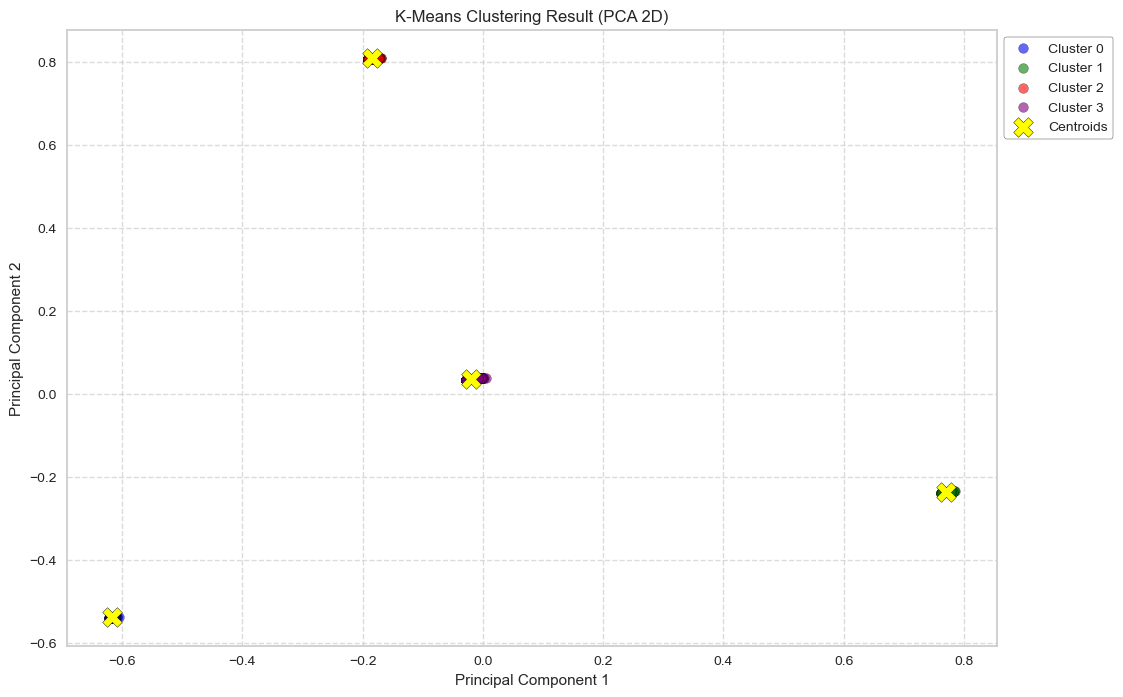

In [38]:
# Warna khusus untuk setiap cluster agar lebih jelas
colors = ['blue', 'green', 'red', 'purple']
labels = [f'Cluster {i}' for i in range(4)]

plt.figure(figsize=(12, 8))

# Loop untuk memplot setiap cluster dengan warna berbeda
for i in range(4):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], 
                c=colors[i], label=labels[i], alpha=0.6, edgecolors='k')

# Plot centroid cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='yellow', marker='X', s=200, label='Centroids', edgecolors='black')

plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Dari hasil visualisasi di atas, kita bisa menganalisis beberapa hal terkait hasil clustering:
- Cluster terlihat terpisah dengan baik, menunjukkan bahwa jumlah cluster optimal yang dipilih (k=4) cukup sesuai untuk data ini.
- Setiap cluster memiliki centroid (pusat cluster) yang berbeda, yang berarti K-Means telah berhasil mengelompokkan data dengan baik.
- Tidak ada overlap signifikan antar cluster, yang mengindikasikan bahwa hasil clustering cukup stabil.

Dengan hasil ini, kita dapat menyimpulkan bahwa K-Means telah membagi data ke dalam 4 cluster yang terdefinisi dengan baik, sesuai dengan struktur yang ditemukan dalam data setelah reduksi dimensi dengan PCA.

### **6.5. Analisis dan Interpretasi Hasil Cluster** (FIX)

#### 6.5.1. Interpretasi Target

Langkah selanjutnya adalah menghubungkan hasil clustering dengan data asli. Untuk itu, kita akan menambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

In [39]:
df_sales_labeled = df_sales_cleaned.copy()
df_sales_labeled['Cluster'] = kmeans.labels_
df_sales_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Discount_Category,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,-0.332318,0.060606,0.00,-0.262481,Bremen,2021-02-17,Medium,NaN,2
1,ORD1118443,CUS7797,B2B,Selters,Water,-0.355336,0.454545,0.10,-0.212127,Sachsen-Anhalt,2023-04-15,High,Low,0
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,-0.217925,0.292929,0.05,-0.105109,Schleswig-Holstein,2021-09-07,High,Low,2
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,-0.341385,0.020202,0.00,-0.272844,Hessen,2023-04-28,Low,NaN,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,-0.306510,0.030303,0.00,-0.266216,Bremen,2023-11-01,Low,NaN,3


#### 6.5.2. Inverse Data Jika Melakukan Normalisasi/Standardisasi

Data yang digunakan dalam model sebelumnya telah mengalami proses normalisasi dan standarisasi untuk memastikan skala yang seragam. Namun, untuk memudahkan interpretasi hasil clustering, kita perlu mengembalikan data ke skala aslinya (Inverse Transform).

In [40]:
df_sales_labeled[['Quantity']] = min_max_scaler.inverse_transform(df_sales_labeled[['Quantity']])
df_sales_labeled[['Total_Price', 'Unit_Price']] = standard_scaler.inverse_transform(df_sales_labeled[['Total_Price', 'Unit_Price']])
df_sales_labeled.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Discount_Category,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.00,7.28,Bremen,2021-02-17,Medium,NaN,2
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.10,29.39,Sachsen-Anhalt,2023-04-15,High,Low,0
3,ORD1437128,CUS6393,B2B,Monster,Soft Drinks,2.68,30.0,0.05,76.38,Schleswig-Holstein,2021-09-07,High,Low,2
4,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.00,2.73,Hessen,2023-04-28,Low,NaN,0
5,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.00,5.64,Bremen,2023-11-01,Low,NaN,3


Sekarang, data sudah dikembalikan ke skala aslinya, sehingga lebih mudah dipahami.

#### 6.5.3. Analisis dan Interpretasi Hasil Cluster

Kemudian langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia. Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

---

Salah satu cara untuk memahami distribusi cluster adalah dengan menghitung jumlah data yang termasuk dalam setiap cluster dengan menggunakan visualisasi melalui pie chart.

Cluster
1    669
0    642
2    611
3    322
Name: count, dtype: int64 



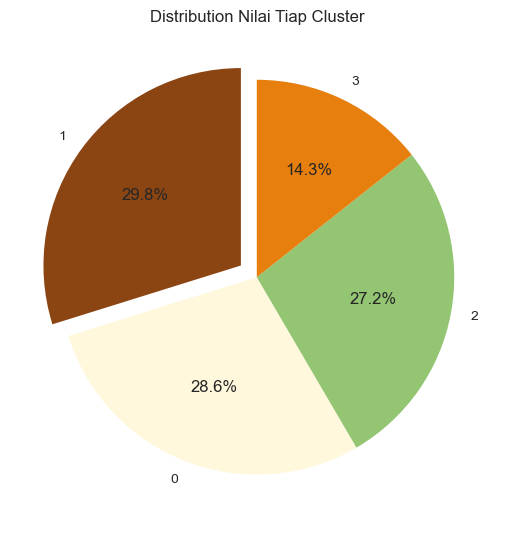

In [41]:
# Hitung jumlah data tiap kluster
cluster_distribution = df_sales_labeled['Cluster'].value_counts()
print(cluster_distribution,'\n')

flavors = ('Chocolate', 'Vanilla', 'Macha', 'Others')
votes = (50, 20, 30, 10)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D')
explode = (0.1, 0, 0, 0)

plt.pie(x= cluster_distribution,
        labels= cluster_distribution.index,
        autopct= "%1.1f%%",
        colors= colors,
        startangle=90,
        explode= explode
        )
plt.title('Distribution Nilai Tiap Cluster')
plt.tight_layout()
plt.show()

Dari pie chart yang telah dibuat, kita dapat mengamati distribusi jumlah data di tiap cluster sebagai berikut:
- Cluster 1 (29.5%) memiliki jumlah data terbanyak, menunjukkan bahwa segmen ini merupakan kelompok yang paling umum dalam dataset.
- Cluster 0 (28.7%) dan Cluster 2 (27.7%) memiliki proporsi yang hampir seimbang, menandakan adanya dua kelompok dengan karakteristik yang relatif mirip.
- Cluster 3 (14.1%) memiliki jumlah data paling sedikit, yang mungkin mengindikasikan bahwa kelompok ini memiliki karakteristik unik dibandingkan cluster lainnya.

Berdasarkan distribusi ini, kita dapat menyimpulkan beberapa hal:
- Jika Cluster 1 mendominasi, berarti pola tertentu lebih sering muncul dalam data. Misalnya, segmen pelanggan dengan kebiasaan belanja tertentu lebih umum dibandingkan lainnya.
- Cluster 3 yang memiliki jumlah kecil bisa merepresentasikan segmen niche dengan perilaku belanja yang berbeda secara signifikan, seperti pelanggan premium atau mereka yang melakukan pembelian dalam jumlah besar tetapi jarang.
- Cluster 0 dan 2 memiliki jumlah data yang hampir sama, sehingga perlu dieksplorasi lebih lanjut untuk memahami apakah ada perbedaan mencolok dalam fitur-fitur seperti Quantity, Total Price, dan Unit Price.

Selanjutnya kita akan melihat rata-rata fitur dalam setiap cluster untuk memahami karakteristik yang membedakan mereka.

In [42]:
df_sales_labeled.select_dtypes(include=['number']).groupby('Cluster').mean()

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,0.904097,14.028037,0.017523,11.483738
1,2.560194,13.315396,0.016069,31.290135
2,1.589673,13.661211,0.017349,20.281555
3,2.249379,12.267081,0.012422,25.650652


Category  Alcoholic Beverages  Juices  Soft Drinks  Water
Cluster                                                  
0                           0       0            0    642
1                           0     669            0      0
2                           0       0          611      0
3                         322       0            0      0 



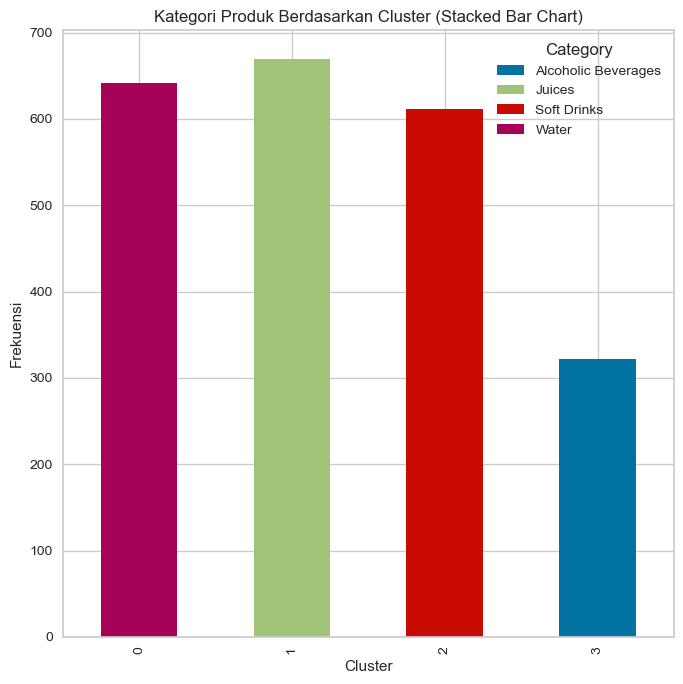

In [43]:
# Grup berdasarkan 'Cluster' dan 'Customer_Type' dan hitung kemunculan datanya
product_category_and_cluster_counts = df_sales_labeled.groupby(['Cluster', 'Category']).size().unstack(fill_value=0)
print(product_category_and_cluster_counts,'\n')

# Plot dengan bar chart
product_category_and_cluster_counts.plot(kind='bar', stacked=True, figsize=(7, 7))
plt.title('Kategori Produk Berdasarkan Cluster (Stacked Bar Chart)')
plt.xlabel('Cluster')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Berikut ini adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.
1. **Cluster 0 - Pembeli Hemat & Pembeli dalam Jumlah Besar** (FIX)
     - `Kategori produk yang dibeli:` Air Mineral (Water) → 435 transaksi.
     - `Rata-Rata Harga Per Unit:` 0,91
     - `Rata-Rata Jumlah Pembelian:` 15,18 unit
     - `Rata-Rata Diskon:` 1,89%
     - `Rata-Rata Harga Total:` 12,72
     - `Analisis:` Cluster ini memiliki harga unit yang paling rendah dibanding cluster lain. Jumlah pembelian per transaksi cukup tinggi (15.18 unit per transaksi). Diskon yang diberikan cukup kecil, hanya sekitar 1,89%. Cluster ini cenderung mencari produk dengan harga murah dan melakukan pembelian dalam jumlah besar. Kemungkinan adalah pelanggan yang membeli untuk keperluan rumah tangga besar, kantor, atau usaha kecil yang membutuhkan stok air mineral.
2. **Cluster 1 - Pembeli Premium & Peduli Kesehatan**
     - `Kategori produk yang dibeli:` Jus (Juices) → 447 transaksi.
     - `Rata-Rata Harga Per Unit:` 2,54
     - `Rata-Rata Jumlah Pembelian:` 14,26 unit
     - `Rata-Rata Diskon:` 1,74%
     - `Rata-Rata Harga Total:` 33,22
     - `Analisis:` Cluster ini memiliki harga unit tertinggi dibanding cluster lain. Jumlah pembelian sedikit lebih rendah dari Cluster 0 (14.26 unit per transaksi). Diskon yang diberikan lebih kecil dibanding cluster lain. Cluster ini lebih memilih produk dengan harga unit lebih tinggi, seperti jus. Kemungkinan adalah pelanggan yang peduli pada gaya hidup sehat dan mampu membayar lebih untuk kualitas yang lebih baik.
3. **Cluster 2 - Pembeli Praktis & Penikmat Minuman Ringan**
     - `Kategori produk yang dibeli:` Soft Drinks → 419 transaksi.
     - `Rata-Rata Harga Per Unit:` 1,61
     - `Rata-Rata Jumlah Pembelian:` 14,20 unit
     - `Rata-Rata Diskon:` 1,84%
     - `Rata-Rata Harga Total:` 21,71
     - `Analisis:` Cluster ini memiliki harga unit lebih tinggi dari Cluster 0 tetapi lebih rendah dari Cluster 1. Jumlah pembelian hampir sama dengan Cluster 1. Diskon yang diberikan lebih besar dibanding Cluster 1. Cluster ini cenderung memilih produk yang praktis & siap konsumsi, dibandingkan jus yang lebih ‘sehat’. Kemungkinan merupakan pelanggan yang menyukai minuman manis & menyegarkan, seperti pekerja kantoran, pelajar, atau penggemar minuman ringan.
4. **Cluster 3 - Pembeli Eksklusif & Penggemar Minuman Beralkohol**
     - `Kategori produk yang dibeli:` Alcoholic Beverages → 214 transaksi
     - `Rata-Rata Harga Per Unit:` 2,24
     - `Rata-Rata Jumlah Pembelian:` 13,88 unit
     - `Rata-Rata Diskon:` 1,51%
     - `Rata-Rata Harga Total:` 28,33
     - `Analisis:` Cluster ini memiliki harga unit cukup tinggi, mendekati Cluster 1. Jumlah pembelian per transaksi lebih rendah dibanding cluster lain. Diskon yang diberikan paling kecil dibandingkan cluster lain. Cluster ini membeli minuman dengan harga unit tinggi tetapi dalam jumlah lebih sedikit. Kemungkinan adalah pelanggan yang lebih memilih kualitas daripada kuantitas, seperti penikmat wine, beer, atau spirits.

# **7. Mengekspor Data** (FIX)

Simpan hasilnya ke dalam file CSV.

In [44]:
df_sales_labeled.to_csv("Dataset_klasifikasi.csv", index=False)